
# Women and Children first...? The Sinking of the RMS Titanic

A statistical analysis by Eliu Schmitt (mail@eliu.de).

On April 14th, 1912 the RMS Titanic on the maiden voyage from Southampton to New York hit an iceberg in the Atlantic. Over 1.500 of the 2,224 passengers and crew on board died when the ship sank. Due to the high number of casualties this is one the biggest accidents in civil shipping.

The high number of casualties rises many question. First and foremost, why so few people could be saved. While this question is manly attributed to a limited number of lifeboats, it also raises questions, who was saved. Was chivalry a decisive element? Did women and children have a higher chance of survival? Or is it all talk and men have a better chance of survival because they are stronger? Other questions would be, if a higher economic status lead to a higher chance of survival or if more family members on board did influence the chance of survival.

In [1]:
# Python3.5

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from collections import Counter
from scipy.stats import ttest_ind, tmean, tstd, ttest_ind_from_stats, linregress, norm, t


data = list(csv.reader(open('titanic-data.csv', 'r'), delimiter=','))


def get_st(c):
    return {'1': '1st', '2': '2nd', '3': '3rd'}[c]


def get_percentage(a, b, r=2, with_brackets=True):
    if with_brackets:
        return "(" + "{:.2f}".format(round(a / b * 100, r)) + " %)"
    else:
        return "{:.2f}".format(round(a / b * 100, r)) + " %"

    
def convert(row, labels):
    result = {}
    result[labels[0]] = row[0] #PasengerID
    result[labels[1]] = bool(int(row[1])) #Survived bool
    result[labels[2]] = row[2] #Pclass - str
    result[labels[3]] = row[3] # Name
    result[labels[4]] = row[4] #Sex
    if row[5] == '':
        result[labels[5]] = False
    else:
        result[labels[5]] = float(row[5])
    result[labels[6]] = int(row[6]) #SibSp
    result[labels[7]] = int(row[7]) #Parch
    result[labels[8]] = row[8] #TicketID stay str
    result[labels[9]] = float(row[9]) # Fare
    if row[10] == '':  #Cabin
        result[labels[10]] = False
    else:
        result[labels[10]] = row[10]
    result[labels[11]] = row[11]
    return result

data_non_convertet = [{l: v for l, v in zip(data[0], x)} for x in data[1:]]
data_dict = [convert(row, data[0]) for row in data[1:]]

df_r = pd.DataFrame(data_non_convertet)
df = pd.DataFrame(data_dict)
df_age = df[df['Age'] != False]

df.loc[777]

C:\Users\Eliu\Anaconda2\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Age                                        5
Cabin                                  False
Embarked                                   S
Fare                                  12.475
Name           Emanuel, Miss. Virginia Ethel
Parch                                      0
PassengerId                              778
Pclass                                     3
Sex                                   female
SibSp                                      0
Survived                                True
Ticket                                364516
Name: 777, dtype: object

## About the data

The dataset contained information on 891 passengers. Therefore, a relevant portion of the passengers is covered. No data on staff is included in the source.

Entries for all passengers include a PassengerID, the information, if the passenger survived the accident, the booking class, a name, the gender (male, female), a count of siblings and spouses on board, a count of parents and children on board and the port of embarkation. I found no unusual values for these data.

The age is provided for 714 of the 891 passengers. 25 of these 714 values are estimations. All given values are within a reasonable range.

In [2]:
print("Count total:", len(df))
print('Count Age Values:', df['Age'][df['Age'] != False].count())
print('Count Age Estimations:', df['Age'][(df['Age'] % 1) > 0].count())
print('Max. Age:', df['Age'].max())
print('Min. Age:', df['Age'][df['Age'] != False].min())
print('Mean Age:', round(df['Age'][df['Age'] != False].mean(), 2))

Count total: 891
Count Age Values: 714
Count Age Estimations: 25
Max. Age: 80.0
Min. Age: 0.42
Mean Age: 29.7


The ticket number seems to follow different systems. Various numbers are registered for more than one passenger, so the ticket number is not unique. The same number probably means that the passengers booked the trip together, but the count of single ticket number at 547 seems to be quite high, given the assumption, that passengers would probably not go on the voyage alone.

In [3]:
tn = Counter(df['Ticket'])
print('Count not unique ticket numbers:', len([k for k,v in tn.items() if v > 1]))
print('Count unique ticket number:', len([k for k, v in tn.items() if v == 1]))

Count not unique ticket numbers: 134
Count unique ticket number: 547


The data for fare per passenger seems to be also inconsistent. Quite some have registered no fare at all (0 Pounds). The maximum of the fares is a first class ticket. The fares therefore probably sometimes include other passengers as well. There could also be some "free rides", maybe somebody has won a ticket.

In [4]:
fa = df['Fare']
print('Maximum Fare:', round(fa.max(), 2))
print('Name/Id of most expensive passenger:', df.loc[fa.idxmax()]['Name'], "Age:", int(df.loc[fa.idxmax()]['Age']), ", Id:", df.loc[fa.idxmax()]['PassengerId'])
print("")
print("Sum Fares:", "{:,.2f}".format(round(fa.sum(), 2)))
print("Mean Fare:", "{:,.2f}".format(round(fa.mean(), 2)))

Maximum Fare: 512.33
Name/Id of most expensive passenger: Ward, Miss. Anna Age: 35 , Id: 259

Sum Fares: 28,693.95
Mean Fare: 32.20


Most passenger data do not register a cabin. It is not fully clear, if this is just missing data, or if these passengers did not have a cabin (but rather a dormitory or similar). I tend to the missing data, since with the second option we would expect that the 1st class passenger all have a cabin, but here are also quite some without any entry. The cabin data could be used to estimate the length of the way to the lifeboats. Although, it isn't clear, if the passengers actually stayed at the cabin at the time and there is quite some data missing, therefore this is probably difficult.

In [5]:
ca = df['Cabin']
df_cls_1 = df[df['Pclass'] == '1']
df_cls_cbn = df_cls_1['Cabin']

print('Passenger without a registered cabin:', ca[ca == False].count())
print('Fist class passengers without a resistered cabin:', df_cls_cbn[df_cls_cbn == False].count())

Passenger without a registered cabin: 687
Fist class passengers without a resistered cabin: 40


## The passengers

There are more men than women in the group. Most of the passengers are traveling in the 3rd passenger class. The ratio of men to women is higher in the 3rd passenger class than in the others.



In [6]:
print("Count male:", df['Sex'][df['Sex'] == 'male'].count(), 
      get_percentage(df['Sex'][df['Sex'] == 'male'].count(), len(df)))
print("Count female:", df['Sex'][df['Sex'] == 'female'].count(), 
      get_percentage(df['Sex'][df['Sex'] == 'female'].count(), len(df)))

Count male: 577 (64.76 %)
Count female: 314 (35.24 %)


In [7]:
pc = df['Pclass']
pc_1 = df[df['Pclass'] == '1']
pc_2 = df[df['Pclass'] == '2']
pc_3 = df[df['Pclass'] == '3']
print("Count 1st Passenger Class:", len(pc_1), ", Men:", len(pc_1[pc_1['Sex'] == 'male']), ", Women:", len(pc_1[pc_1['Sex'] == 'female']))
print("Count 2st Passenger Class:", len(pc_2), ", Men:", len(pc_2[pc_2['Sex'] == 'male']), ", Women:", len(pc_2[pc_2['Sex'] == 'female']))
print("Count 3st Passenger Class:", len(pc_3), ", Men:", len(pc_3[pc_3['Sex'] == 'male']), ", Women:", len(pc_3[pc_3['Sex'] == 'female']))

Count 1st Passenger Class: 216 , Men: 122 , Women: 94
Count 2st Passenger Class: 184 , Men: 108 , Women: 76
Count 3st Passenger Class: 491 , Men: 347 , Women: 144


The distribution shows that the majority of the passengers are between 20 and 30 years old.

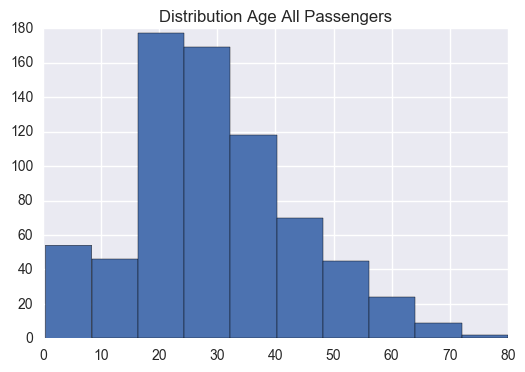

In [8]:
%matplotlib inline

plt.hist(df_age['Age'], label='Count Age All Passengers')
plt.title('Distribution Age All Passengers')
plt.show()

Male passengers tend to be ca. 3 years older on average. But the distribution seems to be roughly the same.

Mean males: 30.7 Count: 453
Mean females: 27.9 Count: 261


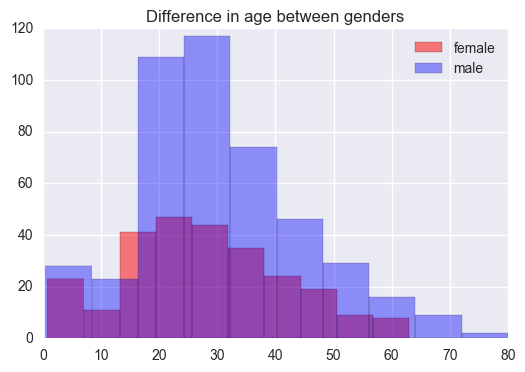

In [9]:
%matplotlib inline

male = df_age[df_age['Sex'] == 'male']['Age']
female = df_age[df_age['Sex'] == 'female']['Age']

print("Mean males:", round(male.mean(),1), "Count:", len(male))
print("Mean females:", round(female.mean(), 1), "Count:", len(female))

plt.hist(female, color='red', alpha=0.5, label='female')
plt.hist(male, color='blue', alpha=0.4, label='male')
plt.title('Difference in age between genders')
plt.legend()
plt.show()

The age varies highly by age with a higher average age at a higher booking class.

In [10]:
def pr_passenger(c):
    print("Count:", len(c), "Max:", int(c.max()), "Mean:", round(c.mean(), 1), "Std.Dev.:", round(c.std(), 1))    

print("All passengers")
pr_passenger(df[df['Age'] != False]['Age'])
print("1st passenger class")
pr_passenger(df_age[df_age['Pclass'] == '1']['Age'])
print("2nd passenger class")
pr_passenger(df_age[df_age['Pclass'] == '2']['Age'])
print("3rd passenger class")
pr_passenger(df_age[df_age['Pclass'] == '3']['Age'])

All passengers
Count: 714 Max: 80 Mean: 29.7 Std.Dev.: 14.5
1st passenger class
Count: 186 Max: 80 Mean: 38.2 Std.Dev.: 14.8
2nd passenger class
Count: 173 Max: 70 Mean: 29.9 Std.Dev.: 14.0
3rd passenger class
Count: 355 Max: 74 Mean: 25.1 Std.Dev.: 12.5


## The Survivors

Out of all passengers in the list only 342 survived. A lot more women survived, even given that there were more men than women in the group. The survivors are roughly evenly distributed between the three booking classes with a somewhat higher count towards 1st class and a lower towards the 2nd class. Compared to the people traveling in that class in total the percentage show an advantage of the higher booking classes. Age in general seems to have only little effect, but looking at children ages 7 years or younger shows a different picture.

In [11]:
survivors = df[df['Survived']]

In [12]:
def show_survivors(c):
    print("{} passenger class".format(get_st(c)))
    print("Count:", Counter(survivors['Pclass'])[c],
          get_percentage(Counter(survivors['Pclass'])[c], len(survivors)),
          "Male:", Counter(survivors[survivors['Pclass'] == c]['Sex'])['male'],
          get_percentage(Counter(survivors[survivors['Pclass'] == c]['Sex'])['male'], Counter(survivors['Pclass'])[c]),
          "Female:", Counter(survivors[survivors['Pclass'] == c]['Sex'])['female'],
          get_percentage(Counter(survivors[survivors['Pclass'] == c]['Sex'])['female'], Counter(survivors['Pclass'])[c]))

print("All surviving passengers")
print("Count:", len(survivors),
      get_percentage(len(survivors), len(df)),
      "Male:", sum(survivors['Sex'] == 'male'),
      get_percentage(sum(survivors['Sex'] == 'male'), len(survivors)),
      "Female:", sum(survivors['Sex'] == 'female'),
      get_percentage(sum(survivors['Sex'] == 'female'), len(survivors)))

show_survivors('1')
show_survivors('2')
show_survivors('3')

All surviving passengers
Count: 342 (38.38 %) Male: 109 (31.87 %) Female: 233 (68.13 %)
1st passenger class
Count: 136 (39.77 %) Male: 45 (33.09 %) Female: 91 (66.91 %)
2nd passenger class
Count: 87 (25.44 %) Male: 17 (19.54 %) Female: 70 (80.46 %)
3rd passenger class
Count: 119 (34.80 %) Male: 47 (39.50 %) Female: 72 (60.50 %)


Percentage of survivors by class relative to total passengers in that class

In [13]:
def show_surv(c):
    print('{} passenger class:'.format(get_st(c)), 
          get_percentage(Counter(survivors['Pclass'])[c], Counter(df['Pclass'])[c], with_brackets=False))

show_surv('1')
show_surv('2')
show_surv('3')

1st passenger class: 62.96 %
2nd passenger class: 47.28 %
3rd passenger class: 24.24 %


Age of the survivors

In [14]:
def survivor_class_age(c):
    def survivor_class(c):
        return survivors[survivors['Pclass'] == c]
    return survivor_class(c)[survivor_class(c)['Age'] != False]['Age']

print('All Survivors')
pr_passenger(survivors[survivors['Age'] != False]['Age'])
print("1st Passenger Class")
pr_passenger(survivor_class_age('1'))
print("2nd Passenger Class")
pr_passenger(survivor_class_age('2'))
print("3rd Passenger Class")
pr_passenger(survivor_class_age('3'))
print("")
print("Difference all survivors - all passengers")
print("Mean:", round(survivors[survivors['Age'] != False]['Age'].mean() - df[df['Age'] != False]['Age'].mean(),2))

All Survivors
Count: 290 Max: 80 Mean: 28.3 Std.Dev.: 15.0
1st Passenger Class
Count: 122 Max: 80 Mean: 35.4 Std.Dev.: 13.8
2nd Passenger Class
Count: 83 Max: 62 Mean: 25.9 Std.Dev.: 14.8
3rd Passenger Class
Count: 85 Max: 63 Mean: 20.6 Std.Dev.: 12.0

Difference all survivors - all passengers
Mean: -1.36


A look at children aged 0 to 7 and older passengers ages 60 and higher

In [15]:
children = df[df['Age'] != False]
children = children[children['Age'] <= 7]
adults = df[df['Age'] != False]
adults = adults[adults['Age'] > 7]
older = df[df['Age'] != False]
older = older[older['Age'] >= 60]

print("Children")
print("Count:", len(children), "Boys:", Counter(children['Sex'])['male'], "Girls:", Counter(children['Sex'])['female'])
print("Survivors Count:", sum(children['Survived']), 
      "Boys:", Counter(children[children['Survived']]['Sex'])['male'], 
      "Girls:", Counter(children[children['Survived']]['Sex'])['female'])
print("")
print("Comparison survival children / not children:")
print("Survival rate not children (7+):", get_percentage(Counter(adults['Survived'])[True], len(adults), with_brackets=False))
print("Survival rate children:", get_percentage(Counter(children['Survived'])[True], len(children), with_brackets=False))
print("Survival rate older passengers", get_percentage(Counter(older['Survived'])[True], len(older), with_brackets=False))
print("Survival rate all passengers", get_percentage(Counter(df['Survived'])[True], len(df), with_brackets=False))

Children
Count: 50 Boys: 26 Girls: 24
Survivors Count: 34 Boys: 16 Girls: 18

Comparison survival children / not children:
Survival rate not children (7+): 38.55 %
Survival rate children: 68.00 %
Survival rate older passengers 26.92 %
Survival rate all passengers 38.38 %


At a first look gender and booking class seems to have the biggest effect on the chance of survival. The age of the passenger also seems to have some effect, as the average age of the survivors is lower than of the whole group. At both ends of the age range (children and old passengers) there seems to be big variation. More than two out of three children survived, while only about one out of four older passengers survived.

## Statistical analysis

### Gender

I'm testing the effect of gender with a two independent sample t-test with the following hypothesis:

Null-Hypothesis: The mean chance of survival in a ship-accident is the same for passengers of both genders. 

$H_{0}: \mu(survival)_{males} = \mu(survival)_{females} $

Alternative-Hypothesis: The mean chance of survival in a ship-accident is different for women and men. 

$H_{1}: \mu(survival)_{males} \neq \mu(survival)_{females} $

The following test shows that the Null-Hypothesis can be rejected. A t-statistic of $\pm$ 19.3 is considered highly significant. It is therefore highly unlikely that this outcome results from chance.

In [16]:
def show_two_tail_independent_samples_ttest(x, x_label, y, y_label, alpha_level=0.05):
    ttest = ttest_ind(x, y)
    alpha_twotail = alpha_level / 2
    ci_low, ci_high = norm.interval(alpha_level, loc=x.mean(), scale=x.std())
    degf = len(x) + len(y) - 2
    t_crit = t.isf(alpha_twotail, degf)
    
    print("Statistics")
    print(x_label, "- Count:", len(x), "Mean:", "{:.2f}".format(round(x.mean(), 2)), "Std.Dv.", "{:.2f}".format(round(x.std(), 2)))
    print(y_label, "- Count:", len(y), "Mean:", "{:.2f}".format(round(y.mean(), 2)), "Std.Dv.", "{:.2f}".format(round(y.std(), 2)))
    print("alpha-level:", alpha_level)
    print("t-critical: + or -", round(t_crit, 2) , "(two tailed test)")
    print("t-statistic:", round(ttest[0], 2))
    print('p-value:', ttest[1])
    print("r_squared:", round(ttest[0]**2 / ( ttest[0] ** 2 + degf), 3))
    print("CI:", "{:.2f}".format(round(ci_low, 2)), "to" ,"{:.2f}".format(round(ci_high, 2)))

    
def test_for_survial_ratio(col, value, x_label, y_label):
    show_two_tail_independent_samples_ttest(df[df[col] == value]['Survived'], x_label, 
                                            df[df[col] != value]['Survived'], y_label)

def test_for_numeric(col):
    show_two_tail_independent_samples_ttest(df[df['Survived'] == False][col], "Dead", 
                                            df[df['Survived'] == True][col], "Survivors")
    
test_for_survial_ratio('Sex', 'male', "Males", "Females")

Statistics
Males - Count: 577 Mean: 0.19 Std.Dv. 0.39
Females - Count: 314 Mean: 0.74 Std.Dv. 0.44
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: -19.3
p-value: 1.40606613088e-69
r_squared: 0.295
CI: 0.16 to 0.21


### Passenger class (1st class / 2nd and 3rd class)

I'm testing the effect of the booking class (passenger class) with a two independent sample t-test with the following hypothesis:

Null-Hypothesis: The mean chance of survival in a ship-accident is the same for passengers of all classes. 

$H_{0}: \mu(survival)_{1st class} = \mu(survival)_{other classes} $

Alternative-Hypothesis: The mean chance of survival in a ship-accident is different for passengers of the first class and the other classes. 

$H_{1}: \mu(survival)_{1st class} \neq \mu(survival)_{other classes} $

The following test shows that the Null-Hypothesis can be rejected. A t-statistic of $\pm$ 8.9 is considered highly significant. It is therefore highly unlikely that this outcome results from chance.

In [17]:
test_for_survial_ratio('Pclass', '1', '1st class', '2nd and 3rd class')

Statistics
1st class - Count: 216 Mean: 0.63 Std.Dv. 0.48
2nd and 3rd class - Count: 675 Mean: 0.31 Std.Dv. 0.46
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 8.9
p-value: 3.19058224175e-18
r_squared: 0.082
CI: 0.60 to 0.66


### Passenger class (2nd class / 3rd class)

In addition to the test before I'm testing the effect of the booking class with a two independent sample t-test between the 2nd and the third passenger class:

$H_{0}: \mu(survival)_{2nd class} = \mu(survival)_{3rd class} $

$H_{1}: \mu(survival)_{2nd class} \neq \mu(survival)_{3rd class} $

The following test shows that the Null-Hypothesis can be rejected. A t-statistic of $\pm$ 5.93 is considered highly significant. It is therefore highly unlikely that this outcome results from chance.

In [18]:
show_two_tail_independent_samples_ttest(df[df['Pclass'] == '2']['Survived'], "2nd class",
                                       df[df['Pclass'] == '3']['Survived'], "3rd class")

Statistics
2nd class - Count: 184 Mean: 0.47 Std.Dv. 0.50
3rd class - Count: 491 Mean: 0.24 Std.Dv. 0.43
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 5.93
p-value: 4.82479949515e-09
r_squared: 0.05
CI: 0.44 to 0.50


### Passenger class (1st class /  2nd class)

In addition to the test before I'm testing the effect of the booking class with a two independent sample t-test between the 1st and the 2nd passenger class:

$H_{0}: \mu(survival)_{1nd class} = \mu(survival)_{2nd class} $

$H_{1}: \mu(survival)_{1nd class} \neq \mu(survival)_{2nd class} $ 

The following test shows that the Null-Hypothesis can be rejected. A t-statistic of $\pm$ 3.18 is considered significant at an alpha level of 0.05 on a two tailed test. Therefore, it is unlikely that this outcome is the results of chance. Although the difference between the 1st class and all classes as well as 2nd to 3rd class seems to be higher.

In [19]:
show_two_tail_independent_samples_ttest(df[df['Pclass'] == '1']['Survived'], "1st class",
                                       df[df['Pclass'] == '2']['Survived'], "2nd class")

Statistics
1st class - Count: 216 Mean: 0.63 Std.Dv. 0.48
2nd class - Count: 184 Mean: 0.47 Std.Dv. 0.50
alpha-level: 0.05
t-critical: + or - 1.97 (two tailed test)
t-statistic: 3.18
p-value: 0.00159546566684
r_squared: 0.025
CI: 0.60 to 0.66


### Passenger class (1st class /  3rd class)

Test of the effect of the booking class with a two independent sample t-test between the 1st and the 3rd passenger class:

$H_{0}: \mu(survival)_{1nd class} = \mu(survival)_{3rd class} $

$H_{1}: \mu(survival)_{1nd class} \neq \mu(survival)_{3rd class} $

The following test shows that the Null-Hypothesis can be rejected. A t-statistic of $\pm$ 10.62 is considered highly significant at an alpha level of 0.05 on a two tailed test. Therefore, it is unlikely that this outcome is the results of chance. The difference between the first class and the third booking class show the highest t-statistic.

In [20]:
show_two_tail_independent_samples_ttest(df[df['Pclass'] == '1']['Survived'], "1st class",
                                       df[df['Pclass'] == '3']['Survived'], "3nd class")

Statistics
1st class - Count: 216 Mean: 0.63 Std.Dv. 0.48
3nd class - Count: 491 Mean: 0.24 Std.Dv. 0.43
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 10.62
p-value: 1.48039591199e-24
r_squared: 0.138
CI: 0.60 to 0.66


### Age

Test of the effect of the Survival on the average age of the passengers with a two independent sample t-test between survivors and the not surviving passengers:

$H_{0}: \mu(age)_{survivors} = \mu(age)_{dead} $

$H_{1}: \mu(age)_{survivors} \neq \mu(age)_{dead} $

The following test shows a significant t-statistic at $\pm$ 2.07.

In [21]:
show_two_tail_independent_samples_ttest(df_age[df_age['Survived'] == False]['Age'], "Dead",
                                       df_age[df_age['Survived'] == True]['Age'], "Survivors")

Statistics
Dead - Count: 424 Mean: 30.63 Std.Dv. 14.17
Survivors - Count: 290 Mean: 28.34 Std.Dv. 14.95
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 2.07
p-value: 0.0391246540135
r_squared: 0.006
CI: 29.74 to 31.51


### Age (Survival children / not children)

Test of the effect of the age of the passengers with a two independent sample t-test between children (7 years and younger) and not children (over 7 years):

$H_{0}: \mu(survival)_{children} = \mu(survival)_{not children} $

$H_{1}: \mu(survival)_{children} \neq \mu(survival)_{not children} $

The following test shows asignificant t-statistic at $\pm$ 4.13.

In [22]:
df_age = df[df['Age'] != False]

show_two_tail_independent_samples_ttest(df_age[df_age['Age'] <= 7]['Survived'], "Children",
                                       df_age[df_age['Age'] > 7]['Survived'], "Not children")

Statistics
Children - Count: 50 Mean: 0.68 Std.Dv. 0.47
Not children - Count: 664 Mean: 0.39 Std.Dv. 0.49
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 4.13
p-value: 4.0345872864e-05
r_squared: 0.023
CI: 0.65 to 0.71


### Age (Survival children and adolescent  / not children)

Test of the effect of the age of the passengers with a two independent sample t-test between children and adolecent (18 years and younger) and adults (over 18 years):

$H_{0}: \mu(survival)_{childrenandadolescent} = \mu(survival)_{adults} $

$H_{1}: \mu(survival)_{childrenandadolescent} \neq \mu(survival)_{adults} $

The following test shows a significant t-statistic at $\pm$ 2.61. The t-statitic is lower than for the children.

In [23]:
show_two_tail_independent_samples_ttest(df_age[df_age['Age'] <= 18]['Survived'], "Children",
                                       df_age[df_age['Age'] > 18]['Survived'], "Not children")

Statistics
Children - Count: 139 Mean: 0.50 Std.Dv. 0.50
Not children - Count: 575 Mean: 0.38 Std.Dv. 0.49
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 2.62
p-value: 0.00910402753214
r_squared: 0.01
CI: 0.47 to 0.54


### Age (Survival children and adults / older passengers)

Test of the effect of the age of the passengers with a two independent sample t-test between passengers between 0 and 60 years and those 60 and older:

$H_{0}: \mu(survival)_{childrenandadults} = \mu(survival)_{older passengers} $

$H_{1}: \mu(survival)_{children and adults} \neq \mu(survival)_{older passengers} $

The following test shows a t-statistic at $\pm$ 1.45. This is not considered to be statistical significant.

In [24]:
show_two_tail_independent_samples_ttest(df_age[df_age['Age'] < 60]['Survived'], "Children and adults",
                                       df_age[df_age['Age'] >= 60]['Survived'], "Older passengers")

Statistics
Children and adults - Count: 688 Mean: 0.41 Std.Dv. 0.49
Older passengers - Count: 26 Mean: 0.27 Std.Dv. 0.45
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 1.45
p-value: 0.147942559109
r_squared: 0.003
CI: 0.38 to 0.44


### Siblings and Spouses

The following test looks for the average number of siblings and spouses of the surviving and dead passengers.

$H_{0}: \mu(SibSp)_{survivors} = \mu(SibSp)_{dead} $

$H_{1}: \mu(SibSp)_{survivors} \neq \mu(SibSp)_{dead} $

The t-statistic at $\pm$ 1.05 is not considered significant. Therefore we can not reject die null-hypothesis.

In [25]:
show_two_tail_independent_samples_ttest(df[df['Survived'] == False]['SibSp'], "Dead",
                                      df[df['Survived'] == True]['SibSp'], "Survivors")

Statistics
Dead - Count: 549 Mean: 0.55 Std.Dv. 1.29
Survivors - Count: 342 Mean: 0.47 Std.Dv. 0.71
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 1.05
p-value: 0.292243928698
r_squared: 0.001
CI: 0.47 to 0.63


### Parents and Children

The following test looks for the average parents and children both the surviving and the dead had on board.

$H_{0}: \mu(Parch)_{survivors} = \mu(Parch)_{dead}$

$H_{1}: \mu(Parch)_{survivors} \neq \mu(Parch)_{dead}$

The t-statistic at $\pm$ 2.44 is considered significant. Therefore the null-pypothesis can be rejected.

In [26]:
show_two_tail_independent_samples_ttest(df[df['Survived'] == False]['Parch'], "Dead",
                                      df[df['Survived'] == True]['Parch'], "Survivors")

Statistics
Dead - Count: 549 Mean: 0.33 Std.Dv. 0.82
Survivors - Count: 342 Mean: 0.46 Std.Dv. 0.77
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: -2.44
p-value: 0.0147992453747
r_squared: 0.007
CI: 0.28 to 0.38


### Women and Parents & Children

In [27]:
show_two_tail_independent_samples_ttest(df[df['Sex'] == 'male']['Parch'], "Men",
                                      df[df['Sex'] != 'male']['Parch'], "Women")

Statistics
Men - Count: 577 Mean: 0.24 Std.Dv. 0.61
Women - Count: 314 Mean: 0.65 Std.Dv. 1.02
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: -7.55
p-value: 1.0739326016e-13
r_squared: 0.06
CI: 0.20 to 0.27


### Fare and survival rate

Test the median fare payed by the surviving and the dead passengers.

$H_{0}: \mu(Fare)_{survivors} = \mu(Fare)_{dead}$

$H_{1}: \mu(Fare)_{survivors} \neq \mu(Fare)_{dead}$

The test shows an significant t-statistic. Therefore the null-hypothesis can be rejected.

In [28]:
show_two_tail_independent_samples_ttest(df[df['Survived'] == False]['Fare'], "Dead",
                                      df[df['Survived'] == True]['Fare'], "Survivors")

Statistics
Dead - Count: 549 Mean: 22.12 Std.Dv. 31.39
Survivors - Count: 342 Mean: 48.40 Std.Dv. 66.60
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: -7.94
p-value: 6.12018934192e-15
r_squared: 0.066
CI: 20.15 to 24.09


### Port of embarkment and survival rate

The following three tests show the survival rate of the passengers who embarked at one port compared to the two others. The Cherbourg-passengers survived significantly more often, the Queenstown-passengers seem to lie within the mean and the Southampton-passengers seem to have died more often.

In [29]:
show_two_tail_independent_samples_ttest(df[df['Embarked'] == 'C']['Survived'], "Cherybourg",
                                      df[df['Embarked'] != 'C']['Survived'], "Other Ports")
print("")
show_two_tail_independent_samples_ttest(df[df['Embarked'] == 'Q']['Survived'], "Queenstown",
                                      df[df['Embarked'] != 'Q']['Survived'], "Other Ports")
print("")
show_two_tail_independent_samples_ttest(df[df['Embarked'] == 'S']['Survived'], "Southhampton",
                                      df[df['Embarked'] != 'S']['Survived'], "Other Ports")

Statistics
Cherybourg - Count: 168 Mean: 0.55 Std.Dv. 0.50
Other Ports - Count: 723 Mean: 0.34 Std.Dv. 0.48
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 5.09
p-value: 4.39715132981e-07
r_squared: 0.028
CI: 0.52 to 0.58

Statistics
Queenstown - Count: 77 Mean: 0.39 Std.Dv. 0.49
Other Ports - Count: 814 Mean: 0.38 Std.Dv. 0.49
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: 0.11
p-value: 0.913353235243
r_squared: 0.0
CI: 0.36 to 0.42

Statistics
Southhampton - Count: 644 Mean: 0.34 Std.Dv. 0.47
Other Ports - Count: 247 Mean: 0.51 Std.Dv. 0.50
alpha-level: 0.05
t-critical: + or - 1.96 (two tailed test)
t-statistic: -4.7
p-value: 3.03611106452e-06
r_squared: 0.024
CI: 0.31 to 0.37


## Conclusion


The chance of survival for women and children was in fact significant higher compared to the relevant other groups. As well did the higher booking classes, especially the 1st passenger class, fared significantly better. Other significant findings were the port of embarkation, but there is no visible reason, why the port of embarkation could have possibly influenced the survival chance. It is just, that many 1st class passengers embarked in Cherbourg and many 3rd class passengers in Southampton. The surviving passengers payed a significantly higher fare than the dead. This was to be expected as the higher booking classes payed a higher fare. The higher rate of parents and children on board for the group of the survivor’s correlates with women more often traveling with parents or children.

We might speculate why these groups fared better. This does not pro chivalry but is also do not suggest it's absence. Reasons for the higher survival rate of the higher passenger classes might be that these passengers got "lifeboat-preference", but it could also mean, that the 1st class passengers had their cabins nearer to the lifeboats, or that they were more educated and therefore better able to follow instructions. With the lower booking classes, we expect a lower socioeconomic status. Therefore, there were probably passengers who were not able to speak English and therefore could not follow instructions.

It is hard to even speculate about recommendations. Obviously to send more women and children on board or only allow higher booking classes won't do much good for the safety of shipping. Although from the perspective of an individual booking a cabin in the 1st class might be a safer bet, at least back in the first decades of the 19th century. Not a very helpful advice since the funds to pay for a higher class ticket were probably usually not available. Therefore, the big factors were mainly things the individual could not influence.

The obvious recommendations to lower casualties would be safer driving, harder ships, more lifeboats and a crew trained for the evacuation of the entire crew and passengers. Many of these points have since been implemented in international shipping guidelines.



